# Setup

Note for this one you have to run it without the anomaly and water column average code, then run the woa regridding file which will allow you to get the anomalies when you run this again.

See this documentation on ragged arrays: 
https://www.nodc.noaa.gov/OC5/WOD/netcdf_descr.html

In [1]:
# import your standard packages
%run ../../../global_tools/start.py

# import your local functions
sys.path.insert(1, '../')
from local_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

Default libraries loaded.


# Parameters and Paths

In [2]:
inpath = "/tigress/GEOCLIM/LRGROUP/shared_data/WOD/latest/"
outfn = '../../data/wod_processed.nc'

lat_bounds = [-1.5, 33]
lon_bounds = [48.5, 102.5]

# Get Data

In [77]:
fns = sorted(glob.glob(inpath + '*APB.nc')) # sorted() makes sure the files are sorted in time
fns

['/tigress/GEOCLIM/LRGROUP/shared_data/WOD/latest/ocldb1614048463.15476_APB.nc']

In [98]:
DEPTH = []
total_obs_cnt = 0

for ff,fn in enumerate(fns):
    ds_in = xr.open_dataset(fn)
    DEPTH.extend(np.array(ds_in.z))
    total_obs_cnt = total_obs_cnt + len(ds_in.casts)
DEPTH = np.unique(DEPTH)
total_obs_cnt,DEPTH

(16244, array([   0.,    5.,   10.,   15.,   20.,   25.,   30.,   35.,   40.,
          45.,   50.,   55.,   60.,   65.,   70.,   75.,   80.,   85.,
          90.,   95.,  100.,  125.,  150.,  175.,  200.,  225.,  250.,
         275.,  300.,  325.,  350.,  375.,  400.,  425.,  450.,  475.,
         500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,  900.,
         950., 1000., 1050., 1100., 1150., 1200., 1250., 1300., 1350.,
        1400., 1450., 1500., 1550., 1600., 1650., 1700., 1750., 1800.,
        1850., 1900., 1950.], dtype=float32))

In [84]:
# initialize vars
lat = []
lon = []
dtime = []
dtype = []
TEMP = []
DOXY = []
PSAL = []
NITRTATE = []
PHOSPHATE = []
CHL = []

# loop through each dataset
obs_count = 0
for ff,fn in enumerate(fns):
    print(ff+1, '/', len(fns),  fn)
    
    # read in file
    ds_in = xr.open_dataset(fn)
    
    cast_count = 0
    for cc in range(len(ds_in.casts)):
        
        if ff == 0: # APB -> TEMP,PSAL
            
            cast_no_end = int(ds_in.Temperature_row_size[cc])
            # extract cast
            temp = ds_in.Temperature[cast_count:cast_no_end]
            z = ds_in.z[cast_count:cast_no_end]
        
                
#         elif ff == 2:# CTD -> TEMP,PSAL,DO,CHL
            
#         elif ff == 3:# DRB -> TEMP,PSAL,DO
            
#         elif ff == 4:# MRB -> TEMP,PSAL,DO,CHL
            
#         elif ff == 5:# OSD -> TEMP,PSAL,DO,CHL
            
#         elif ff == 6:# PFL -> TEMP,PSAL,DO
            
#         elif ff == 7:# XBT -> TEMP
        
            cast_count = cast_count + int(cast_no_end) + 1

1 / 1 /tigress/GEOCLIM/LRGROUP/shared_data/WOD/latest/ocldb1614048463.15476_APB.nc


In [81]:
len(temp[np.array(ind)]) 

11

In [85]:
np.nanmean(temp[np.array(ind)])

/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


nan

In [86]:
temp_50_200m

[6.0838156]

In [80]:
doxy_50_200m

[]

In [74]:
doxy_50_200m.append(np.nan)

In [63]:
z

<xarray.DataArray 'z' (z_obs: 21)>
array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,
        60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.], dtype=float32)
Coordinates:
    z        (z_obs) float32 ...
Dimensions without coordinates: z_obs
Attributes:
    standard_name:        depth
    long_name:            depth_below_sea_surface
    units:                m
    positive:             down
    ancillary_variables:  z_sigfigs z_WODflag

In [100]:
ds_in

<xarray.Dataset>
Dimensions:                        (Temperature_obs: 494767, casts: 16244, z_obs: 494767)
Coordinates:
    lat                            (casts) float32 ...
    lon                            (casts) float32 ...
    time                           (casts) datetime64[ns] ...
    z                              (z_obs) float32 0.0 5.0 10.0 ... 125.0 150.0
Dimensions without coordinates: Temperature_obs, casts, z_obs
Data variables:
    country                        (casts) |S40 ...
    WOD_cruise_identifier          (casts) |S40 ...
    originators_cruise_identifier  (casts) |S40 ...
    wod_unique_cast                (casts) int32 ...
    date                           (casts) int32 ...
    GMT_time                       (casts) timedelta64[ns] ...
    Access_no                      (casts) float64 ...
    Platform                       (casts) |S170 ...
    Orig_Stat_Num                  (casts) float64 ...
    dataset                        (casts) |S170 ...
    real_

In [56]:
ds_in.z[1:int(ds_in.z_row_size[0])]

<xarray.DataArray 'z' (z_obs: 20)>
array([  5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,  60.,
        65.,  70.,  75.,  80.,  85.,  90.,  95., 100.], dtype=float32)
Coordinates:
    z        (z_obs) float32 5.0 10.0 15.0 20.0 25.0 ... 85.0 90.0 95.0 100.0
Dimensions without coordinates: z_obs
Attributes:
    standard_name:        depth
    long_name:            depth_below_sea_surface
    units:                m
    positive:             down
    ancillary_variables:  z_sigfigs z_WODflag

In [99]:
ds_in.Oxygen_row_size

AttributeError: 'Dataset' object has no attribute 'Oxygen_row_size'

In [12]:
# get merged data from tigress
ds_AW = xr.open_dataset(inpath + 'Indian_Ocean_data.nc')
ds_AW

<xarray.Dataset>
Dimensions:   (Pres: 179, n_profil: 95405)
Coordinates:
  * Pres      (Pres) float64 10.0 15.0 20.0 25.0 ... 885.0 890.0 895.0 900.0
  * n_profil  (n_profil) object 'D1900050_001' 'D1900050_002' ... 'W18531826'
Data variables:
    Lon       (n_profil) float64 ...
    Lat       (n_profil) float64 ...
    Time      (n_profil) datetime64[ns] ...
    Temp      (n_profil, Pres) float64 ...
    Psal      (n_profil, Pres) float64 ...
    Doxy      (n_profil, Pres) float64 ...
Attributes:
    Author:       Mathieu POUPON
    Description:  

# Sort by Time

In [5]:
# # add time as a coordinate
ds_AW= ds_AW.assign_coords(unsorted_time=ds_AW.Time)

# reset profile variables to be with respect to time
ds_AW['temp'] = xr.DataArray(ds_AW.Temp,dims = ['unsorted_time','pres'],coords =[ds_AW.time,ds_AW.pres])
ds_AW['psal'] = xr.DataArray(ds_AW.Psal,dims = ['unsorted_time','pres'],coords =[ds_AW.time,ds_AW.pres])
ds_AW['doxy'] = xr.DataArray(ds_AW.Doxy,dims = ['unsorted_time','pres'],coords =[ds_AW.time,ds_AW.pres])
ds_AW['lat'] = xr.DataArray(ds_AW.Lat,dims = ['unsorted_time'],coords =[ds_AW.time])
ds_AW['lon'] = xr.DataArray(ds_AW.Lon,dims = ['unsorted_time'],coords =[ds_AW.time])
ds_AW['type'] = xr.DataArray(ds_AW.type,dims = ['unsorted_time'],coords =[ds_AW.time])
ds_AW['prof'] = xr.DataArray(ds_AW.prof,dims = ['unsorted_time'],coords =[ds_AW.time])
# get rid of intial time variable
ds_AWG = ds_AWG[['temp','psal','doxy','lat','lon','type','prof']]

sorted_time = ds_AWG.unsorted_time.sortby(ds_AWG.unsorted_time)

# sort based on time
ds_AWG['temp'] = xr.DataArray(ds_AWG.temp.sortby(ds_AWG.unsorted_time),dims = ['time','pres'],coords =[sorted_time,ds_AWG.pres])
ds_AWG['psal'] = xr.DataArray(ds_AWG.psal.sortby(ds_AWG.unsorted_time),dims = ['time','pres'],coords =[sorted_time,ds_AWG.pres])
ds_AWG['doxy'] = xr.DataArray(ds_AWG.doxy.sortby(ds_AWG.unsorted_time),dims = ['time','pres'],coords =[sorted_time,ds_AWG.pres])
ds_AWG['lat'] = xr.DataArray(ds_AWG.lat.sortby(ds_AWG.unsorted_time),dims = ['time'],coords =[sorted_time])
ds_AWG['lon'] = xr.DataArray(ds_AWG.lon.sortby(ds_AWG.unsorted_time),dims = ['time'],coords =[sorted_time])
ds_AWG['type'] = xr.DataArray(ds_AWG.type.sortby(ds_AWG.unsorted_time),dims = ['time'],coords =[sorted_time])
ds_AWG['prof'] = xr.DataArray(ds_AWG.prof.sortby(ds_AWG.unsorted_time),dims = ['time'],coords =[sorted_time])
# get rid of intial time variable
ds_AWG = ds_AWG[['temp','psal','doxy','lat','lon','type','prof','time']]
ds_AWG

<xarray.Dataset>
Dimensions:  (pres: 201, time: 306118)
Coordinates:
    prof     (time) int32 286462 286463 286464 286465 ... 251414 252160 252508
  * time     (time) datetime64[ns] 1827-10-30 1836-05-15 ... 2020-02-07
  * pres     (pres) int32 0 5 10 15 20 25 30 35 ... 970 975 980 985 990 995 1000
Data variables:
    temp     (time, pres) float32 nan nan nan nan ... 6.482922 6.45122 6.4202943
    psal     (time, pres) float32 nan nan nan ... 34.940956 34.939495 34.937958
    doxy     (time, pres) float32 nan nan nan ... 48.04291 48.480473 48.916607
    lat      (time) float32 -18.0 -27.5 -7.9 -26.78 ... -3.16 11.251 1.808
    lon      (time) float32 119.83 41.0 85.33 98.5 ... 73.594 53.525 84.366
    type     (time) int32 2 2 2 2 2 2 2 2 2 2 2 2 2 ... 0 0 0 0 0 0 0 0 0 1 1 1

# Subset

In [6]:
ind = (ds_AWG.lat > lat_bounds[0]) & (ds_AWG.lat < lat_bounds[1]) & (ds_AWG.lon < lon_bounds[1]) & (ds_AWG.lon > lon_bounds[0])

time = ds_AWG.time[ind]

ds_out = xr.Dataset(coords={'time': time,
                           'pres': ds_AWG.pres})

ds_out['temp'] = xr.DataArray(ds_AWG.temp[ind],dims = ['time','pres'],coords = [time,ds_AWG.pres])
ds_out['psal'] = xr.DataArray(ds_AWG.psal[ind],dims = ['time','pres'],coords = [time,ds_AWG.pres])
ds_out['doxy'] = xr.DataArray(ds_AWG.doxy[ind],dims = ['time','pres'],coords = [time,ds_AWG.pres])
ds_out['lat'] = xr.DataArray(ds_AWG.lat[ind],dims = ['time'],coords = [time])
ds_out['lon'] = xr.DataArray(ds_AWG.lon[ind],dims = ['time'],coords = [time])
ds_out['type'] = xr.DataArray(ds_AWG.type[ind],dims = ['time'],coords = [time])

time_slice = slice('1958-06-01', '2020-05-31')
ds_out = ds_out.sel(time = time_slice)
ds_out

<xarray.Dataset>
Dimensions:  (pres: 201, time: 146472)
Coordinates:
    prof     (time) int32 254193 254194 254195 254196 ... 229606 252160 252508
  * time     (time) datetime64[ns] 1958-06-01 1958-06-02 ... 2020-02-07
  * pres     (pres) int32 0 5 10 15 20 25 30 35 ... 970 975 980 985 990 995 1000
Data variables:
    temp     (time, pres) float32 nan nan nan nan ... 6.482922 6.45122 6.4202943
    psal     (time, pres) float32 nan nan 36.13 ... 34.939495 34.937958
    doxy     (time, pres) float32 nan nan 174.98756 ... 48.480473 48.916607
    lat      (time) float32 13.27 13.38 13.97 12.88 ... 14.392 11.251 1.808
    lon      (time) float32 55.0 53.52 50.6 49.2 ... 64.739 53.525 84.366
    type     (time) int32 2 2 2 2 2 2 2 2 2 2 2 2 2 ... 0 0 0 0 0 0 0 0 0 0 1 1

# Make New type variable that has the letters

# Remove and negative concentration values

Text(0, 0.5, 'min doxy negs removed')

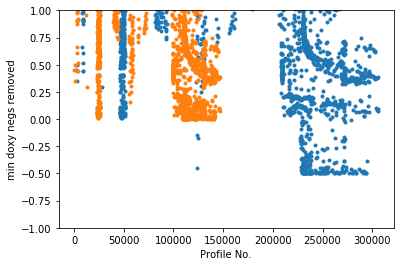

In [7]:
plt.plot(ds_AWG.doxy.min(dim = 'pres'),'.')
plt.ylim([-1,1])
plt.xlabel('Profile No.')
plt.ylabel('min doxy')

# set negative oxygen values to nan
ds_out['doxy'] = ds_out.doxy.where(ds_out.doxy >= 0)

plt.plot(ds_out.doxy.min(dim = 'pres'),'.')
plt.ylim([-1,1])
plt.xlabel('Profile No.')
plt.ylabel('min doxy negs removed')

# Find Anomalies

In [8]:
ds_out['temp_anom'] = ds_out.temp - np.array(ds_WOA.temp)
ds_out['doxy_anom'] = ds_out.doxy - np.array(ds_WOA.doxy)
ds_out['psal_anom'] = ds_out.psal - np.array(ds_WOA.psal)

# Water Column Averages

In [9]:
# find mean temperature and doxy 50-200dbar
ind = (ds_out.pres>= 40) & (ds_out.pres<= 200)

doxy_40_200 = np.nanmean(ds_out.doxy[:,ind],1)
temp_40_200 = np.nanmean(ds_out.temp[:,ind],1)
psal_40_200 = np.nanmean(ds_out.psal[:,ind],1)
doxy_anom_40_200 = np.nanmean(ds_out.doxy_anom[:,ind],1)
temp_anom_40_200 = np.nanmean(ds_out.temp_anom[:,ind],1)
psal_anom_40_200 = np.nanmean(ds_out.psal_anom[:,ind],1)

# find mean temperature and doxy 50-200dbar
ind = (ds_out.pres>= 50) & (ds_out.pres<= 200)

doxy_50_200 = np.nanmean(ds_out.doxy[:,ind],1)
temp_50_200 = np.nanmean(ds_out.temp[:,ind],1)
psal_50_200 = np.nanmean(ds_out.psal[:,ind],1)
doxy_anom_50_200 = np.nanmean(ds_out.doxy_anom[:,ind],1)
temp_anom_50_200 = np.nanmean(ds_out.temp_anom[:,ind],1)
psal_anom_50_200 = np.nanmean(ds_out.psal_anom[:,ind],1)

# find mean temperature and doxy 50-200dbar
ind = (ds_out.pres>= 60) & (ds_out.pres<= 200)

doxy_60_200 = np.nanmean(ds_out.doxy[:,ind],1)
temp_60_200 = np.nanmean(ds_out.temp[:,ind],1)
psal_60_200 = np.nanmean(ds_out.psal[:,ind],1)
doxy_anom_60_200 = np.nanmean(ds_out.doxy_anom[:,ind],1)
temp_anom_60_200 = np.nanmean(ds_out.temp_anom[:,ind],1)
psal_anom_60_200 = np.nanmean(ds_out.psal_anom[:,ind],1)

# add to dataset
ds_out['temp_40_200'] = xr.DataArray(temp_40_200,dims = ['time'],coords =[ds_out.time])
ds_out['doxy_40_200'] = xr.DataArray(doxy_40_200,dims = ['time'],coords =[ds_out.time])
ds_out['psal_40_200'] = xr.DataArray(psal_40_200,dims = ['time'],coords =[ds_out.time])
ds_out['temp_anom_40_200'] = xr.DataArray(temp_anom_40_200,dims = ['time'],coords =[ds_out.time])
ds_out['doxy_anom_40_200'] = xr.DataArray(doxy_anom_40_200,dims = ['time'],coords =[ds_out.time])
ds_out['psal_anom_40_200'] = xr.DataArray(psal_anom_40_200,dims = ['time'],coords =[ds_out.time])

ds_out['temp_50_200'] = xr.DataArray(temp_50_200,dims = ['time'],coords =[ds_out.time])
ds_out['doxy_50_200'] = xr.DataArray(doxy_50_200,dims = ['time'],coords =[ds_out.time])
ds_out['psal_50_200'] = xr.DataArray(psal_50_200,dims = ['time'],coords =[ds_out.time])
ds_out['temp_anom_50_200'] = xr.DataArray(temp_anom_50_200,dims = ['time'],coords =[ds_out.time])
ds_out['doxy_anom_50_200'] = xr.DataArray(doxy_anom_50_200,dims = ['time'],coords =[ds_out.time])
ds_out['psal_anom_50_200'] = xr.DataArray(psal_anom_50_200,dims = ['time'],coords =[ds_out.time])

ds_out['temp_60_200'] = xr.DataArray(temp_60_200,dims = ['time'],coords =[ds_out.time])
ds_out['doxy_60_200'] = xr.DataArray(doxy_60_200,dims = ['time'],coords =[ds_out.time])
ds_out['psal_60_200'] = xr.DataArray(psal_60_200,dims = ['time'],coords =[ds_out.time])
ds_out['temp_anom_60_200'] = xr.DataArray(temp_anom_60_200,dims = ['time'],coords =[ds_out.time])
ds_out['doxy_anom_60_200'] = xr.DataArray(doxy_anom_60_200,dims = ['time'],coords =[ds_out.time])
ds_out['psal_anom_60_200'] = xr.DataArray(psal_anom_60_200,dims = ['time'],coords =[ds_out.time])

/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  fro

# Find Coastal Mask

In [10]:
xx,yy = np.array(ds_out.lon),np.array(ds_out.lat)

mask = mask_coast(xx,yy,[lon_bounds[0],lon_bounds[1],lat_bounds[0],lat_bounds[1]])
mask.shape
mask_xx = xx[mask]
mask_yy = yy[mask]

ds_out['coastal_mask'] = xr.DataArray(mask,dims = ['coastal_loc'],coords =[np.arange(len(mask))])
ds_out['coastal_mask_xx'] = xr.DataArray(mask_xx,dims = ['coastal_pos'],coords =[np.arange(len(mask[mask]))])
ds_out['coastal_mask_yy'] = xr.DataArray(mask_yy,dims = ['coastal_pos'],coords =[np.arange(len(mask[mask]))])
ds_out['coastal_mask_bounds'] = xr.DataArray([lon_bounds[0],lon_bounds[1],lat_bounds[0],lat_bounds[1]],
                                             dims = ['lonmin,lonmax,latmin,latmax'],
                                             coords =[np.arange(4)])

# Save Data

In [11]:
# delete if already present
if os.path.isfile(outfn):
    os.remove(outfn)

ds_out.to_netcdf(outfn,mode='w',format = "NETCDF4")
ds_out

<xarray.Dataset>
Dimensions:                      (coastal_loc: 146472, coastal_pos: 44325, lonmin,lonmax,latmin,latmax: 4, pres: 201, time: 146472)
Coordinates:
    prof                         (time) int32 254193 254194 ... 252160 252508
  * time                         (time) datetime64[ns] 1958-06-01 ... 2020-02-07
  * pres                         (pres) int32 0 5 10 15 20 ... 985 990 995 1000
  * coastal_loc                  (coastal_loc) int64 0 1 2 ... 146470 146471
  * coastal_pos                  (coastal_pos) int64 0 1 2 ... 44322 44323 44324
  * lonmin,lonmax,latmin,latmax  (lonmin,lonmax,latmin,latmax) int64 0 1 2 3
Data variables:
    temp                         (time, pres) float32 nan nan ... 6.4202943
    psal                         (time, pres) float32 nan nan ... 34.937958
    doxy                         (time, pres) float32 nan nan ... 48.916607
    lat                          (time) float32 13.27 13.38 ... 11.251 1.808
    lon                          (time) flo

In [12]:
ds_out.coastal_mask_xx.shape

(44325,)